# Assignment Two

CivE 6388 - Advanced Hydrology

Brandon Whittle

September 25, 2023

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import fsolve

## Problem Four

Solve problemn 5-1 (page 139) in the textbook. Use your programming skill to draw the pdf and cdf and calculate probabilities. 

(5-1) Assume the daily evaporation rates ($E$) have a uniform distribution with $a=0$ and $b=0.35 \frac{\text{in.}}{\text{day}}$. Determine the following probabilities: (a) $P(E>0.1)$; (b) $P(E<0.22)$; (c) $P(E=0.2)$; and (d) $P(0.05<E<0.15).$

c: 2.857


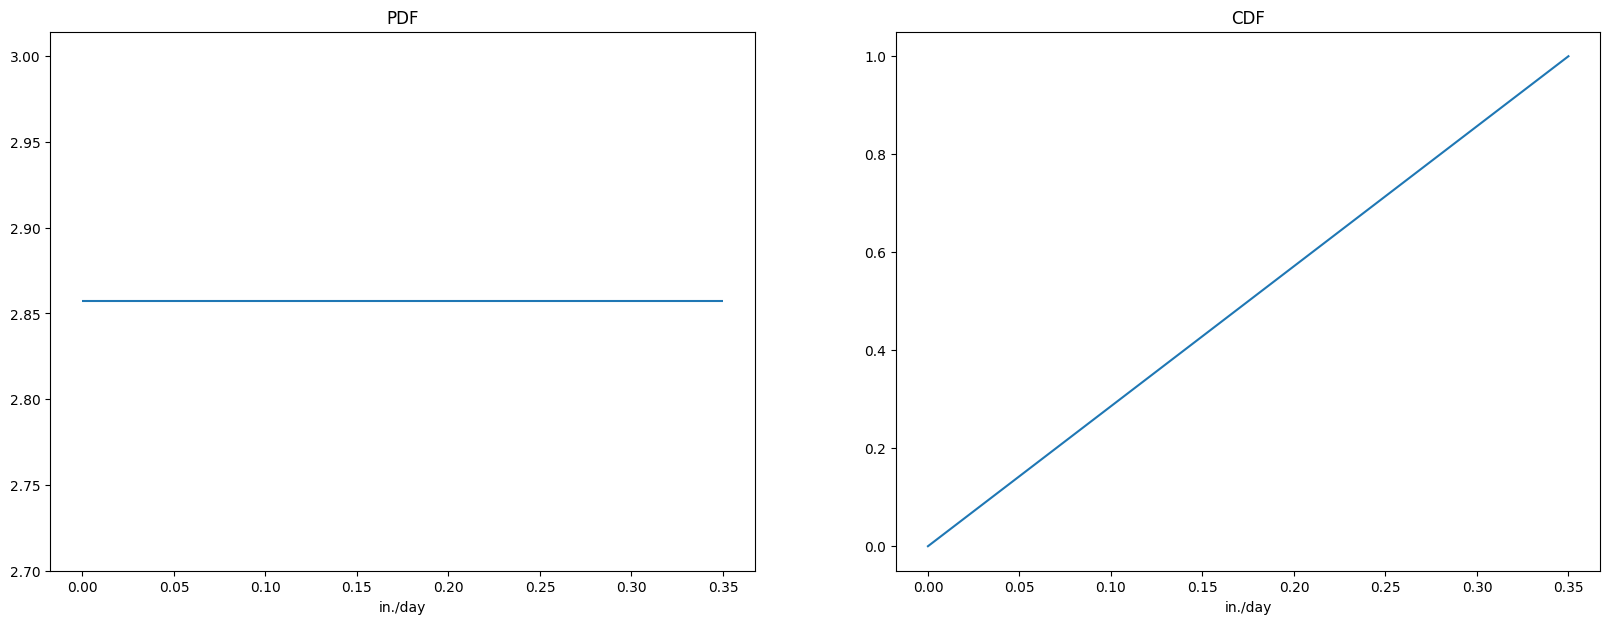

(a) 0.714
(b) 0.629
(c) 0.000
(d) 0.286


In [37]:
a=0 # in/day
b=0.35 # in/day
c = 1/(b-a)

fig, ax = plt.subplots(1, 2, figsize=(20,7))
print(f'c: {c:.3f}')

ax[0].hlines(c, a, b)
ax[0].set(title='PDF', xlabel='in./day')

p04_x = np.linspace(0, 0.35, 100)
ax[1].plot(p04_x, p04_x*(1/(b-a)))
ax[1].set(title='CDF', xlabel='in./day')

plt.show()

# Part A
print(f'(a) {1-c*0.1:.3f}')
print(f'(b) {c*0.22:.3f}')
print(f'(c) {0:.3f}') # Zero because the probability is the area under a given section, 
# and the area of that infiniely thin but "tall" rectangle is zero
print(f'(d) {c*(0.15-0.05):.3f}')

## Problem Five

Solve problem 5-6 (page 175). Use your programming skill to draw the pdf and cdf and calculate probabilities.

(5-6) The average annual precipitation in Washington, DC, is 43 in., with a standard deviation of 6.5 in. If the amounts can be assumed to have a normal distribution, find the probability that the precipitation in any 1 year is (a) greater than 55 in., (b) less than 35 in., (c) either less than 32 or greater than 51 in., (d) between 38 and 48 in. Find the precipitations that have (e) 5% chance of being exceeded, and (f) 1% chance of not being exceeded. 

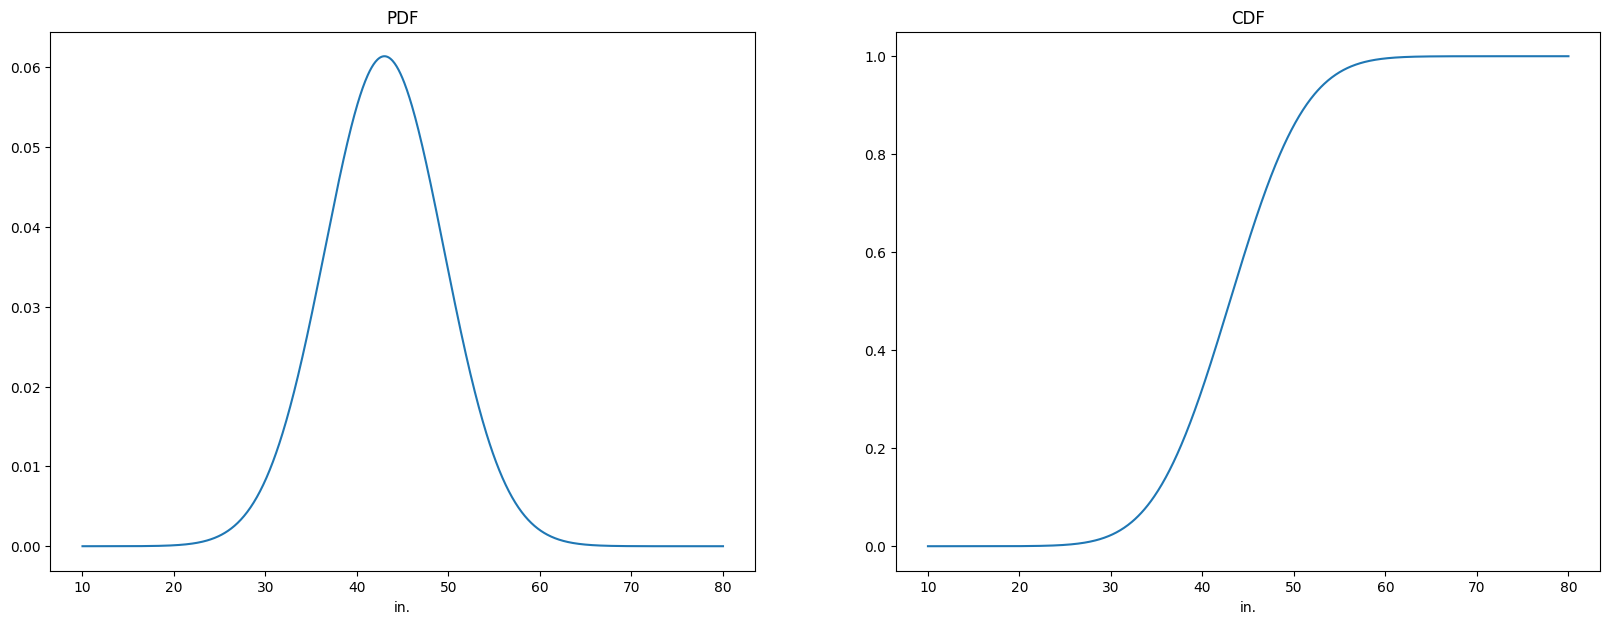

(a) 0.03
(b) 0.11
(c) 0.15
(d) 0.56
(e) 53.69 in.
(f) 27.88 in.


In [77]:
from scipy.special import erf

p05_mean = 43 # in.
p05_stdd = 6.5 # in.

def normal_distribution_pdf(x, mu, sigma):
    return 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-0.5*np.power(((x-mu)/sigma),2))

def normal_distribution_cdf(x, mu, sigma):
    return 0.5*(1+erf((x-mu)/(np.sqrt(2)*sigma)))

def normal_distribution_cdf_variate(x, mu, sigma, variate):
    return 0.5*(1+erf((x-mu)/(np.sqrt(2)*sigma))) - variate

fix, ax = plt.subplots(1, 2, figsize=(20, 7))

p05_x = np.linspace(10, 80, 1000)

ax[0].plot(p05_x, normal_distribution_pdf(p05_x, p05_mean, p05_stdd))
ax[0].set(title='PDF', xlabel='in.')

ax[1].plot(p05_x, normal_distribution_cdf(p05_x, p05_mean, p05_stdd))
ax[1].set(title='CDF', xlabel='in.')

plt.show()

print(f'(a) {1-normal_distribution_cdf(55, p05_mean, p05_stdd):.2f}')
print(f'(b) {normal_distribution_cdf(35, p05_mean, p05_stdd):.2f}')
print(f'(c) {(normal_distribution_cdf(32, p05_mean, p05_stdd) + (1-normal_distribution_cdf(51, p05_mean, p05_stdd))):.2f}')
print(f'(d) {(normal_distribution_cdf(48, p05_mean, p05_stdd) - normal_distribution_cdf(38, p05_mean, p05_stdd)):.2f}')
print(f'(e) {fsolve(normal_distribution_cdf_variate, x0=[55], args=(p05_mean, p05_stdd, 0.95))[0]:.2f} in.')
print(f'(f) {fsolve(normal_distribution_cdf_variate, x0=[30], args=(p05_mean, p05_stdd, 0.01))[0]:.2f} in.')